In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

### GOAL:

1. Instead of using SKLean for KNN Classifiers, create manual classifier.
2. Test the accuracy of manual algorithm to the SKLearn Classifier.

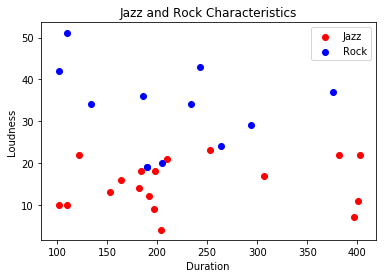

In [3]:
# copying and pasting training and testing data from the Lesson's example

music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
# (obviously) 1 == yes, 2 == no
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [4]:
# making up some BS training data:

music_duration_test = np.array([144,233,241,235,266,400,378,134,167,199,288, 312])
music_loudness_test = np.array([14, 17, 25, 60, 44, 42, 41, 37, 29, 30, 17, 23])

# ^^ for the record, each array has ELEVEN values

Instead of re-inventing the wheel, I am using this knn-from-scratch-tutorial [here](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/).

In [5]:
# Establishing a function for calculating distance of neighbors

import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [6]:
# Establishing a function for identifying nearest neighbor(s)

#KNN prediction and model training
def knn_predict(test_data, train_data, k_value):
    for i in test_data:
        eu_Distance =[]
        knn = []
        good = 0
 
        bad = 0
        for j in train_data:
            eu_dist = euclideanDist(i, j)
            eu_Distance.append((j[5], eu_dist))
            eu_Distance.sort(key = operator.itemgetter(1))
            knn = eu_Distance[:k_value]
            for k in knn:
                if k[0] =='g':
                    good += 1
                else:
                    bad +=1
        if good > bad:
            i.append('g')
        elif good < bad:
            i.append('b')
        else:
            i.append('NaN')

# Accuracy Calculation function
def accuracy(test_data):
    correct = 0
    for i in test_data:
        if i[5] == i[6]:
            correct += 1
    accuracy = float(correct)/len(test_data) *100  #accuracy 
    return accuracy

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(test_dataset)? (<ipython-input-6-01b643ed3e17>, line 39)

In [7]:
# let's see if this works
trainingset = np.array([music.duration, music.loudness])
testInstance = np.array([music_duration_test, music_loudness_test])


In [9]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5) # using K = 5 here

In [11]:
#########

# NOW to compare the above accuracy to the SKLearn package
music_test = []
for (x, y) in zip(music_loudness_test, music_duration_test):
    music_tester = [x,y]
    music_test.append(music_tester)

In [12]:

Xtrain = music[['loudness', 'duration']]
Ytrain = music.jazz
neighbors.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
for x in music_test:
    if neighbors.predict([x]) == 1:
        print("Predicted to be JAZZ")
        print(neighbors.predict_proba([x]))
        print("\n")
    else:
        print("Predicted to be ROCK")
        print(neighbors.predict_proba([x]))
        print("\n")

Predicted to be JAZZ
[[0.2 0.8]]


Predicted to be ROCK
[[0.6 0.4]]


Predicted to be ROCK
[[0.6 0.4]]


Predicted to be ROCK
[[0.6 0.4]]


Predicted to be ROCK
[[0.8 0.2]]


Predicted to be JAZZ
[[0.2 0.8]]


Predicted to be JAZZ
[[0.2 0.8]]


Predicted to be ROCK
[[0.6 0.4]]


Predicted to be JAZZ
[[0.2 0.8]]


Predicted to be ROCK
[[0.6 0.4]]


Predicted to be ROCK
[[0.6 0.4]]


Predicted to be ROCK
[[0.6 0.4]]


